## Trabajar con fotos e imágenes en Python

Para trabajar con imágenes, una librería muy útil es Pillow, que es una
versión más actualizada de PIL (Python Image LIbrary).

Podemos comprobar si está instalada, como siempre, intentando importarla:

In [5]:
import PIL


Si la línea anteerior da algún problema, debemos instalar con:

In [3]:
!pip3 install pillow

El componente más importante en este librería son objetos de la clase Image. Podemos crear 
una imagen directamente usando el méetodo `new`. es necesario indicarle al menos
dos cosas, el modo de la imagen (Color, B/N, escala de grises, indexado...) y el tamaño. 

Para lo primero usamos ciertos códigos (por ejemplo 'RGB' para indicar una imagen en color, es decir,con tres canales: Rojo, verde y azul)

Para lo segundo, una tupla de dos elementos para idicar el ancho y alto de la imagen

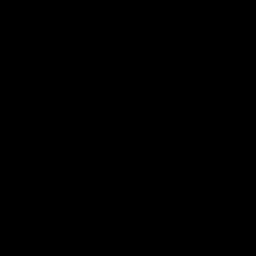

In [7]:
from PIL import Image
img = Image.new('RGB', (256, 256))
img

Como vemos, ha creado una imagen con todos los valores a 0, es decir, negro.
Podemos especificar, con un tercer parámeto, que color queremos para el fondo:

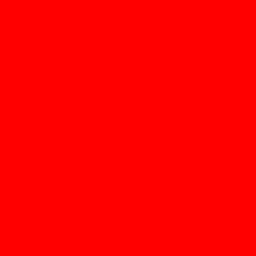

In [2]:
from PIL import Image
img = Image.new('RGB', (256, 256), (255, 0, 0))
img

### Crear una imagen a partir de un fichero

Podemos crear una imagen a partir de un archivo de imagen, como un JPEG o un PNG. Para eso
usamos la función `open` dentro de `Image`. La función espera la ruta del archivo y, opcionalmente, el tipo del mismo. Si no se le especifica nada, intentará descubrirlo por si mismo. Abramos una foto png. Podemos usar el ejemplo situado en `img/globo.jpg`, o descarga cualquier otrs imagen de internet. 

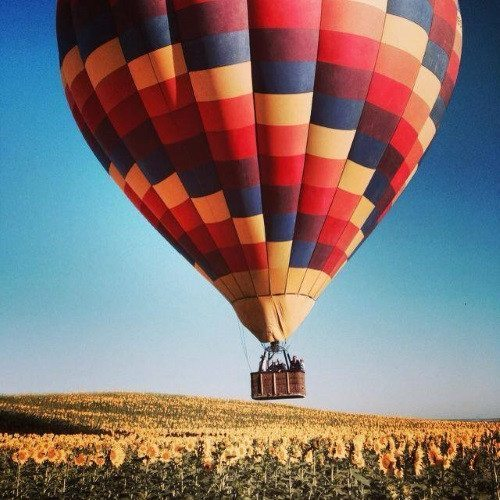

In [5]:
img = Image.open('img/globo.jpg')
img

### Obtener información de la imagen

Una de las cosas que podemos hacer es obtener informacion de la imagen. Por ejemplo, el atributo `size` es una tupla con dos valores: el ancho y el alto de la imagen, en pixels:

In [6]:
img.size

(500, 500)

Con el atributo `mode` también podemos obtener que tipo de imagen es. Para el caso de la
imafgen de ejemplo usado, la del globom, deberia ser `RGB`:

In [7]:
img.mode

'RGB'

### Operaciones con imágenes

Hay varias operaciones que se pueden realizar. Una muy habitual es cmabiar el tamaño o el
modo de la imagen. 

Para cambiar el tamaño de la imagen, podemos usar el metodo `resize`. Se le pasa como parámetro una tupla con el nuevo tamaño, y nos devuelve una nueva imagen con el nuevo tamaño (Técnicamente, _escalada_):

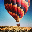

In [8]:
im2 = img.resize((32, 32))
im2

Observemos dos cosas:
 
1.- Observese que el parámetro es solo uno, pero es una tupla, de ahí los 
    dobles paréntesis.

2.- La imagen inicial sIgue inalterada. El método lo que hace es generar una nueva
    imagen. La mayoria de los métodos de las imágenes funcionan así, pero no todos.


**Ejercicio:** Cambiar el código para que la imagen sea de $100 \times 100$ pixels

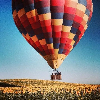

In [11]:
im2 = img.resize((100, 100))
im2

También podemos cambiar el modo. En este caso, podemos pasar de RGB (Color) a L (Lineal, es decir en tonos de gris)
con el método `convert`:


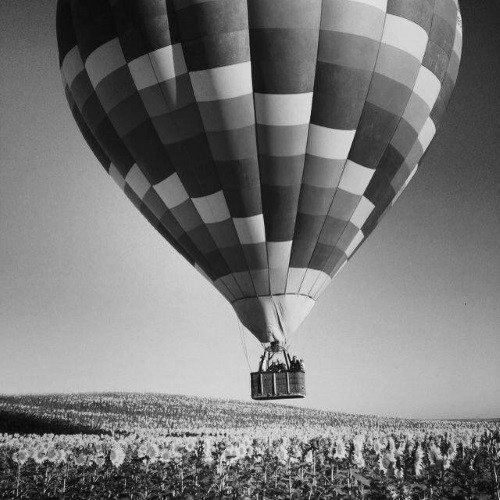

In [13]:
im3 = img.convert('L')
im3

In [14]:
im3.mode

'L'

### Rotar e invertir

Rotas e invertir son operaciones muy habituales con imágenes, y nos serán muy
utiles para desarollo de jeuegos, porque nos permiten utilizar las imágenes
de un montón de formas diferentes. 

Para rotar, se usa el método `rotate`, al que se le pasan los grados que queremos
rotar. Si el valor es positivo, girará en el sentido contrario al de las agujas del reloj, y si es negativo, en el sentido de las agujas del reloj:

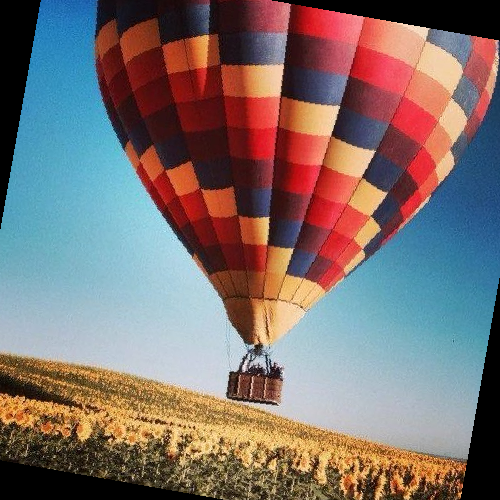

In [18]:
im4 = img.rotate(-10)
im4

Observese que la imagen rotada no cabe en su totalidad en la nueva imagen, ya que las esquinas quedan
fuera. Si se rotan en bloques de 90 grados no hay problema

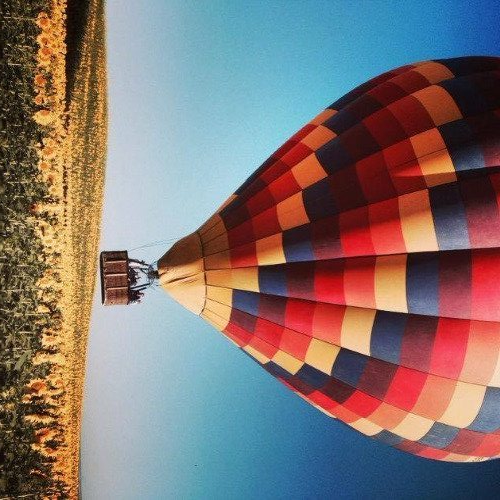

In [21]:
im4 = img.rotate(-90)
im4

Para invertir se usa el método `trasnpose`. Devuelve una imagen que es como un reflejo horizontal o vertical de la imagen original. Necesita un parámetro para indicarle si queremos que la inversión se realliza en el eje horizontal o en el vertical. El módulo define dos valores especiales para esto: `FLIP_LEFT_RIGHT` y `FLIP_TOP_BOTTOM`. Veámoslo con un ejemplo. La foto es muy simétrica en el eje vertical, así que hagamos un cambio
en el eje horizontal:

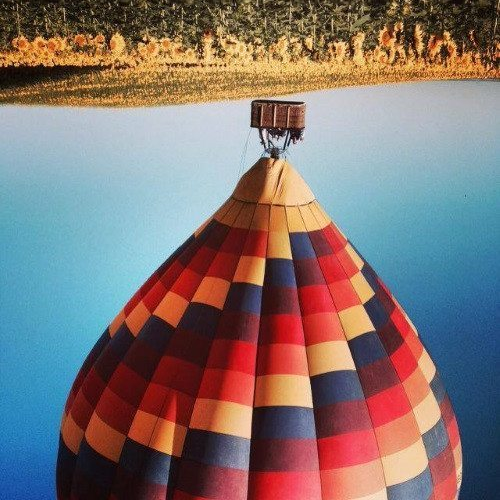

In [25]:
imf = img.transpose(Image.FLIP_TOP_BOTTOM)
imf

Vamos a usar otra foto para la inversión en el eje vertical:

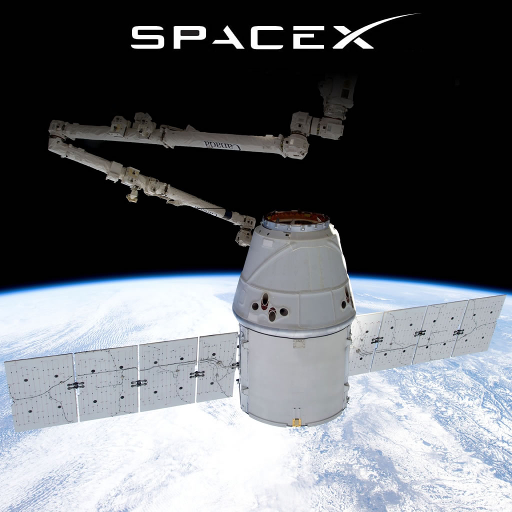

In [27]:
img_spacex = Image.open('img/spacex.png')
img_spacex

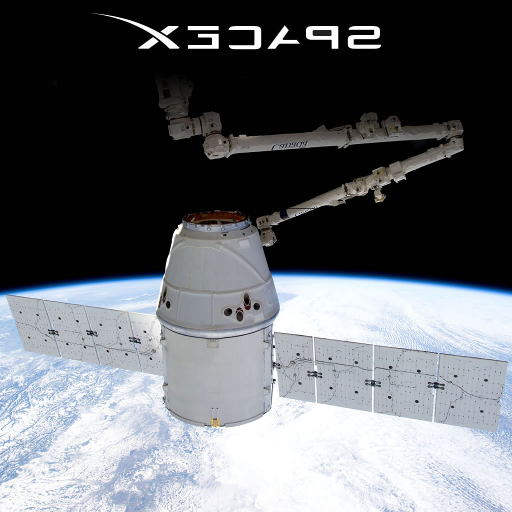

In [29]:
img_spacex.transpose(Image.FLIP_LEFT_RIGHT)

### Generar thumbnails

Hay un método específico para crear _thumbnails_ a partir de una imagen. La traducción al español sería [Copia de contacto](https://es.wikipedia.org/wiki/Copia_por_contacto). La copia de contacto o _thumbnail_ de una imagen es una version escalada, hasta unos determinados límites de la imagen original. A diferencia de un escalado, el tamaño
del _thumbnail_ resultante depende del tamaño del original. Hay pues, dos cosas importantes con esta operación.

1.- Al contrario de lo visto hasta ahora, el método _thumbnail_ no devuelve una nueva
imagen, sino que **modifica la imagen en si**.

2.- Se le especifican un ancho y un alto, pero estos son los valores máximos que 
tendrá la nueva image, ya que se escala pero se mantienen las proporciones.

Veamos un ejemplo con una imagen apaisada:

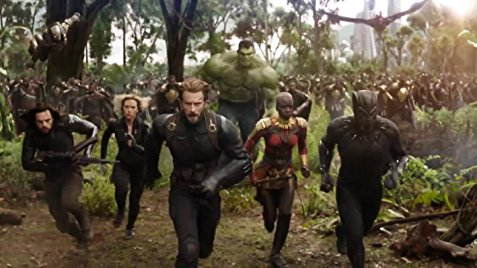

In [34]:
img_avengers = Image.open('img/avengers.jpg')
img_avengers

Sopongamos que queremos un _thumbnail_ de $128\times128$ pixels. Si uso el metodo `resize`  que vimos anteriormente, vemos que la imagen resultaten tienen exactamente el deseado, pero la imagen queda deformada, porque no se respeta el formato:

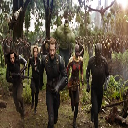

In [36]:
tn = img_avengers.resize((128, 128))
tn

Pero si usamos el método `thumbnail`, vemos que se mantiene el formato. La 
imagen tendrá un ancho de 128 pixels (porque originalmente el ancho era 
mayor que el alto, y por tanto, determina el valor máximo), mientras que 
el alto será inferior, para poder manterner las proporciones correctas:

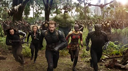

In [44]:
img_avengers = Image.open('img/avengers.jpg')
tn = img_avengers.copy()  # Hacemos una copia previa
tn.thumbnail((128, 128))
tn

## Recortar y pegar

Podemos cortar un fragmento de la imagen con el método `crop`. Se le pasa como parámetro
una tupla de cuatro elementos, especificando las coordenadas x,y de la esquina superior izquierda y la inferior derecha. Veamos el ejemplo:


**Pregunta:** ¿Cuales son las dimensiones (ancho por alto) del
fragmento copiado? Obviamente se puede saber mirando el atributo
`size`, pero la idea es contestarlo en base a lo que sabemos del
funcionamiento del método `crop`.

In [50]:
im.size

(180, 150)

Una vez recortado, ya podemos pegar. Para ello usamos el método `paste`. Paste acepta dos
parámetros, el primero es la imagen que va a pegar y el segundo, las coordenadas
de donde pegar. Atención porque el resultado **NO** es una nueva imagen, sino que se modifica la imagen original:

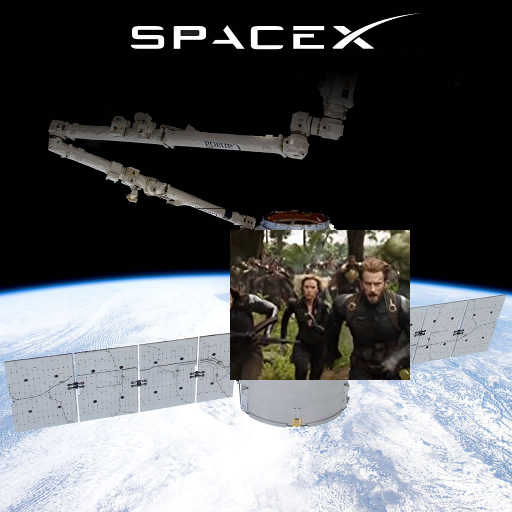

In [54]:
img_spacex = Image.open('img/spacex.png')
img_avengers = Image.open('img/avengers.jpg')
bw = img_avengers.crop((50, 50, 230, 200))
img_spacex.paste(bw, (230, 230))
img_spacex

**Ejercicio** Código para poner una imagen determinada, por ejemplo, un sello
de autor, en la esquina inferior derecha de cualquier imagen que le pasemos, con una
separacion de 10 pixels de cada lado. La imagen
a usar es un sello de $64\times64$ pixels almacenada en `img/sello.png`

In [66]:
sello = Image.open('img/sello.png')
sello.mode

'RGBA'

In [67]:
sello.size

(64, 64)

(550, 412) RGBA


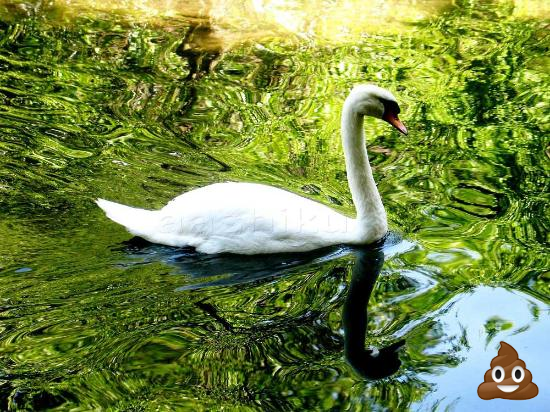

In [78]:
pato = Image.open('img/pato.jpg')
pato_marked = pato.convert('RGBA')
print(pato_marked.size, pato_marked.mode)
ancho, alto = pato_marked.size
pos = (ancho - 74, alto - 74)
pato_marked.paste(sello, pos, mask=sello)
pato_marked